# Benchmark - Collisional Rollout Accuracy

This notebook allows you to reproduce the rollout accuracy showcased for the GNS when considering collisional dynamics.

**Requirements**: Download Datasets + Pre-trained Models; Run Rollout_Accuracy.ipynb

In [1]:
import os
import jax
import sys
import glob
import yaml
import pickle
import numpy as np
import jax.numpy as jnp
from pathlib import Path

# uncomment the line below for nicer plots (needs LaTeX)
# os.environ['MATPLOTLIBRC'] = '../matplotlibrc'
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

sys.path.append('../..')
from gns.utils import get_dx_eq, get_x_eq, get_E, get_stats
from gns.simulator import SMGNS_MW as SMGNS
from gns.tests import plot_trajectory_comparison, rollout_error_collisions
from gns.preprocess import init_XV_collisions, crossings2collisions

## dont let JAX preallocate all GPU memory + free unused arrays 
## https://jax.readthedocs.io/en/latest/gpu_memory_allocation.html
## makes code slower
os.environ["XLA_PYTHON_CLIENT_PREALLOCATE"] = "false" 
os.environ["XLA_PYTHON_CLIENT_ALLOCATOR"] = "platform"

../../models/final/dt1e-1/collisions/0
Simulator Training Dataset
{'L': 1.0, 'augment_t': True, 'augment_x': True, 'boundary': 'periodic', 'data_folder': 'data/dataset/train/10/periodic/', 'dt_simulator': 0.01, 'dt_undersample': 10, 'mode': 'collisions', 'n_neighbors': 1, 'n_sheets': 10, 'save_folder': 'data/processed_temp/train/dt1e-1_collisions', 'var_target': 'dvdt', 'w_size': 5}
Boudary: reflecting 	 #Sheets: 2


  0%|          | 0/100 [00:00<?, ?it/s]



[1/L]	 n_sheets: 2  avg: 0.2266  std: 0.0594  best: 0.0069 (99)  worst: 0.2778 (94)
[1/dx]	 n_sheets: 2  avg: 0.4531  std: 0.1187  best: 0.0138 (99)  worst: 0.5556 (94)
Wasserstein
[1/L]	 n_sheets: 2  avg: 0.2266  std: 0.0594  best: 0.0069 (99)  worst: 0.2778 (94)
[1/dx]	 n_sheets: 2  avg: 0.4531  std: 0.1187  best: 0.0138 (99)  worst: 0.5556 (94)


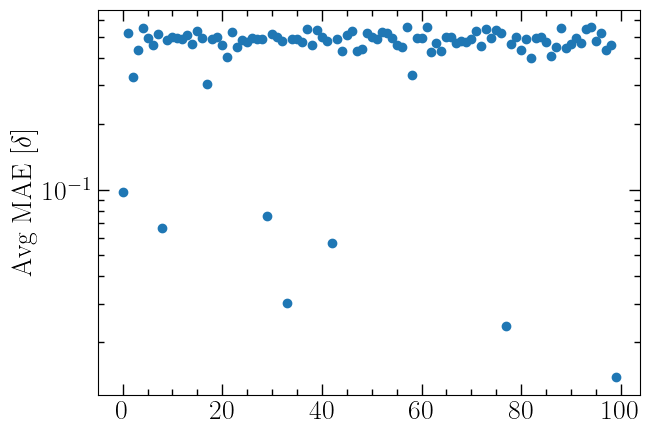

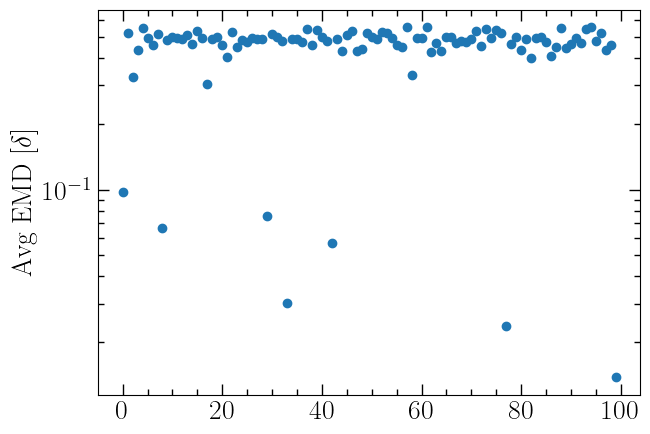

Boudary: reflecting 	 #Sheets: 10


  0%|          | 0/100 [00:00<?, ?it/s]



[1/L]	 n_sheets: 10  avg: 0.0579  std: 0.0205  best: 0.0110 (71)  worst: 0.1073 (28)
[1/dx]	 n_sheets: 10  avg: 0.5793  std: 0.2050  best: 0.1104 (71)  worst: 1.0735 (28)
Wasserstein
[1/L]	 n_sheets: 10  avg: 0.0579  std: 0.0205  best: 0.0110 (71)  worst: 0.1073 (28)
[1/dx]	 n_sheets: 10  avg: 0.5793  std: 0.2050  best: 0.1104 (71)  worst: 1.0735 (28)


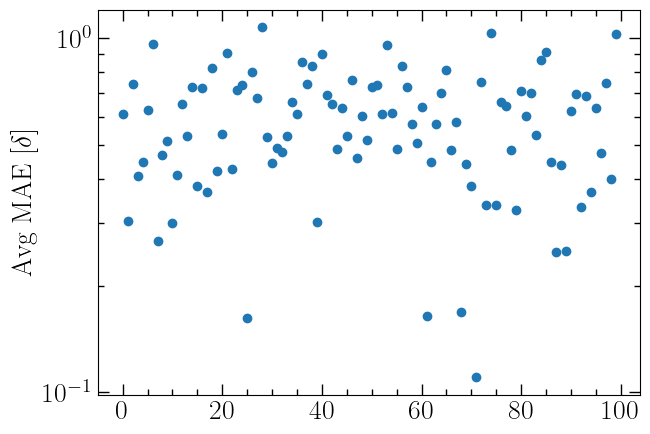

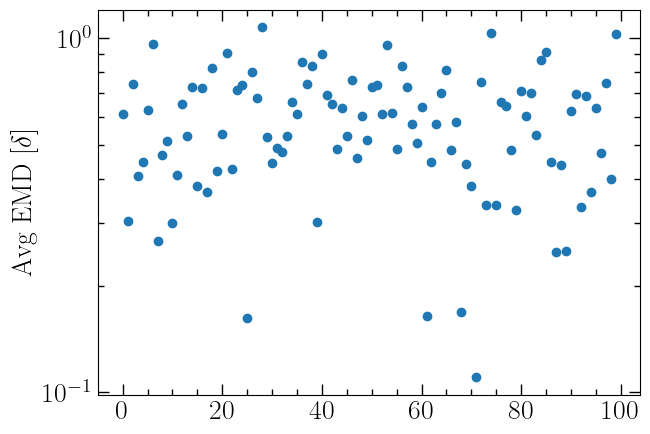

Boudary: reflecting 	 #Sheets: 100


  0%|          | 0/100 [00:00<?, ?it/s]



[1/L]	 n_sheets: 100  avg: 0.0065  std: 0.0010  best: 0.0041 (52)  worst: 0.0091 (53)
[1/dx]	 n_sheets: 100  avg: 0.6476  std: 0.1004  best: 0.4095 (52)  worst: 0.9052 (53)
Wasserstein
[1/L]	 n_sheets: 100  avg: 0.0065  std: 0.0010  best: 0.0041 (52)  worst: 0.0091 (53)
[1/dx]	 n_sheets: 100  avg: 0.6476  std: 0.1004  best: 0.4095 (52)  worst: 0.9052 (53)


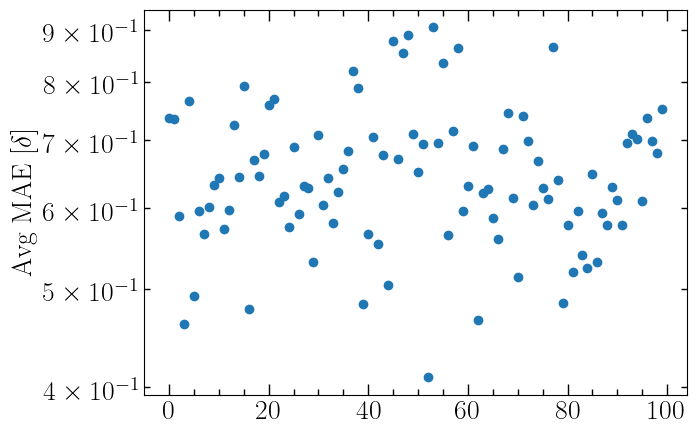

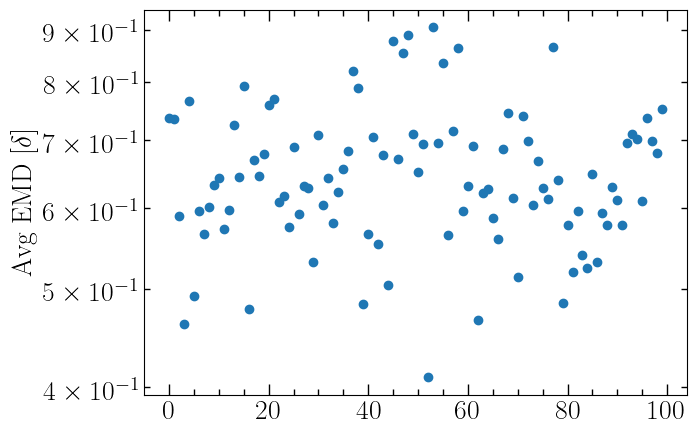

Boudary: reflecting 	 #Sheets: 1000


  0%|          | 0/100 [00:00<?, ?it/s]



[1/L]	 n_sheets: 1000  avg: 0.0006  std: 0.0000  best: 0.0006 (51)  worst: 0.0008 (34)
[1/dx]	 n_sheets: 1000  avg: 0.6493  std: 0.0414  best: 0.5515 (51)  worst: 0.7650 (34)
Wasserstein
[1/L]	 n_sheets: 1000  avg: 0.0006  std: 0.0000  best: 0.0006 (51)  worst: 0.0008 (34)
[1/dx]	 n_sheets: 1000  avg: 0.6493  std: 0.0414  best: 0.5515 (51)  worst: 0.7650 (34)


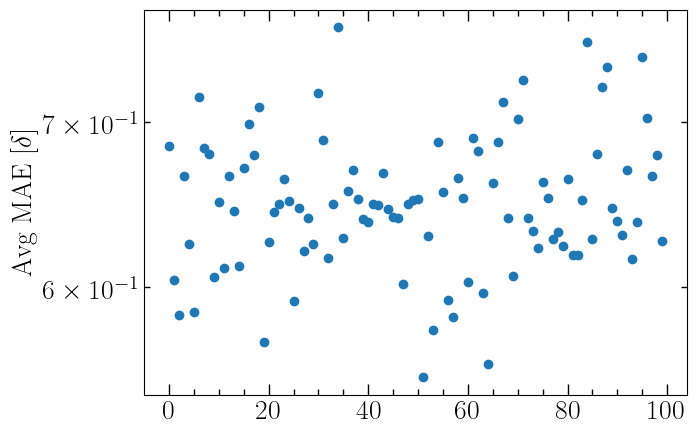

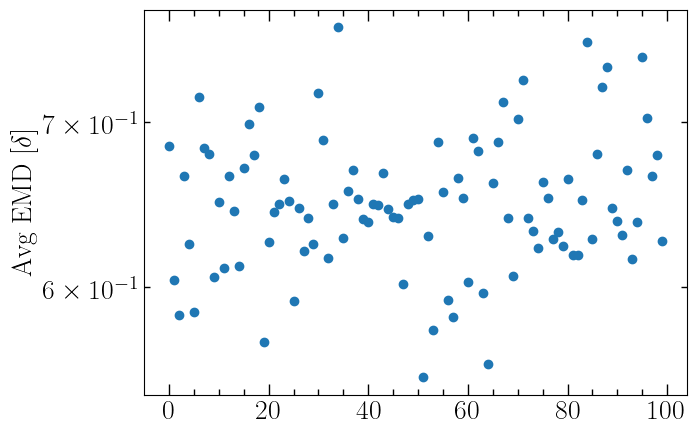

Simulator Training Dataset
{'L': 1.0, 'augment_t': True, 'augment_x': True, 'boundary': 'periodic', 'data_folder': 'data/dataset/train/10/periodic/', 'dt_simulator': 0.01, 'dt_undersample': 10, 'mode': 'collisions', 'n_neighbors': 1, 'n_sheets': 10, 'save_folder': 'data/processed_temp/train/dt1e-1_collisions', 'var_target': 'dvdt', 'w_size': 5}
Boudary: periodic 	 #Sheets: 2


  0%|          | 0/100 [00:00<?, ?it/s]



[1/L]	 n_sheets: 2  avg: 0.1035  std: 0.0671  best: 0.0023 (84)  worst: 0.2548 (73)
[1/dx]	 n_sheets: 2  avg: 0.2069  std: 0.1342  best: 0.0046 (84)  worst: 0.5096 (73)
Wasserstein
[1/L]	 n_sheets: 2  avg: 0.0970  std: 0.0571  best: 0.0023 (84)  worst: 0.1959 (64)
[1/dx]	 n_sheets: 2  avg: 0.1940  std: 0.1142  best: 0.0046 (84)  worst: 0.3918 (64)


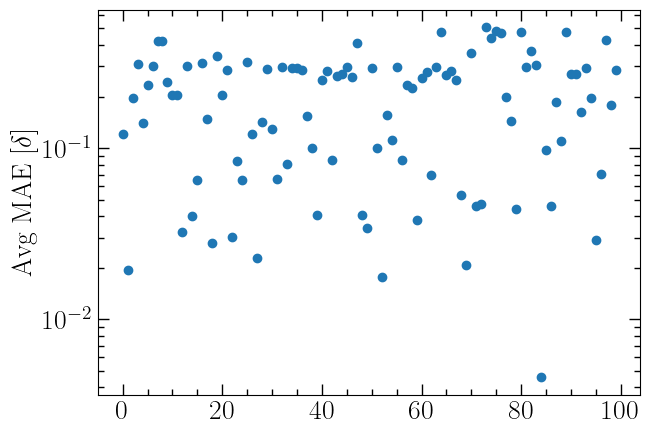

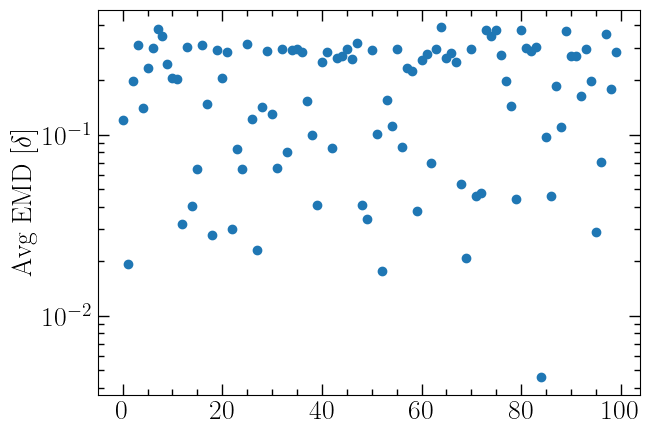

Boudary: periodic 	 #Sheets: 10


  0%|          | 0/100 [00:00<?, ?it/s]



[1/L]	 n_sheets: 10  avg: 0.0421  std: 0.0183  best: 0.0094 (12)  worst: 0.1232 (11)
[1/dx]	 n_sheets: 10  avg: 0.4207  std: 0.1828  best: 0.0936 (12)  worst: 1.2323 (11)
Wasserstein
[1/L]	 n_sheets: 10  avg: 0.0414  std: 0.0165  best: 0.0094 (12)  worst: 0.0875 (10)
[1/dx]	 n_sheets: 10  avg: 0.4137  std: 0.1648  best: 0.0936 (12)  worst: 0.8748 (10)


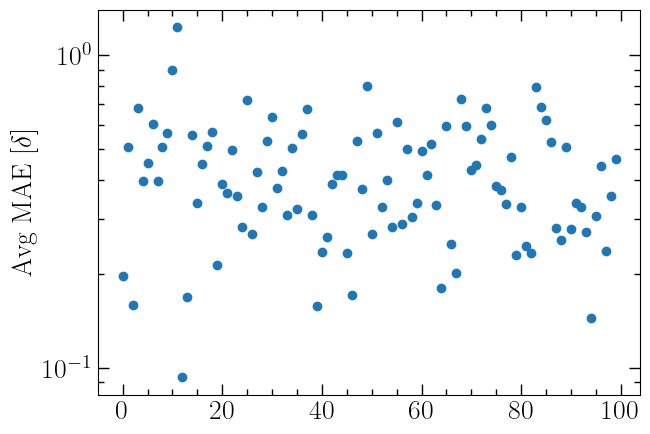

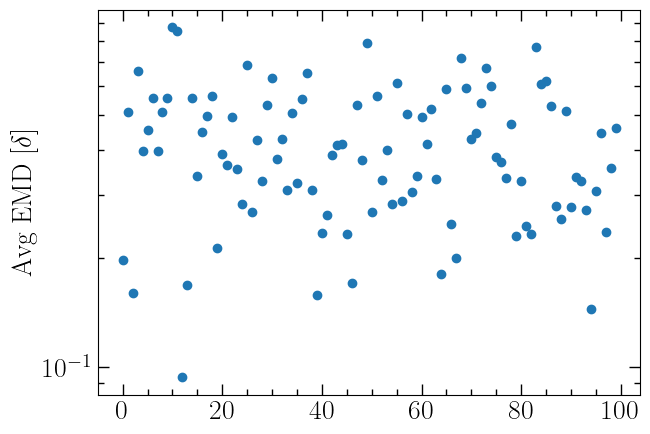

Boudary: periodic 	 #Sheets: 100


  0%|          | 0/100 [00:00<?, ?it/s]

2024-01-03 13:54:34.805038: E external/org_tensorflow/tensorflow/compiler/xla/service/slow_operation_alarm.cc:65] Constant folding an instruction is taking > 1s:

  slice (displaying the full instruction incurs a runtime overhead. Raise your logging level to 4 or above).

This isn't necessarily a bug; constant-folding is inherently a trade-off between compilation time and speed at runtime.  XLA has some guards that attempt to keep constant folding from taking too long, but fundamentally you'll always be able to come up with an input program that takes a long time.

If you'd like to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
2024-01-03 13:54:34.805737: E external/org_tensorflow/tensorflow/compiler/xla/service/slow_operation_alarm.cc:133] The operation took 1m41.417637169s
Constant folding an instruction is taking > 1s:

  slice (displaying the full instruction incurs a runtime overhead. Raise your logging level to 4 or above).

This isn't necess



[1/L]	 n_sheets: 100  avg: 0.0064  std: 0.0011  best: 0.0037 (52)  worst: 0.0096 (51)
[1/dx]	 n_sheets: 100  avg: 0.6409  std: 0.1087  best: 0.3722 (52)  worst: 0.9583 (51)
Wasserstein
[1/L]	 n_sheets: 100  avg: 0.0064  std: 0.0011  best: 0.0037 (52)  worst: 0.0096 (51)
[1/dx]	 n_sheets: 100  avg: 0.6409  std: 0.1087  best: 0.3722 (52)  worst: 0.9583 (51)


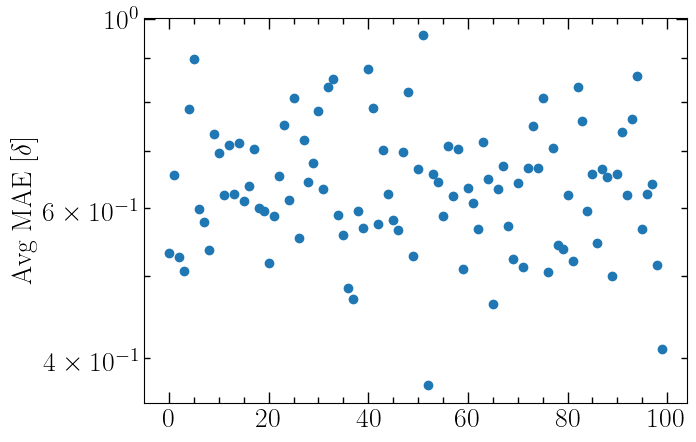

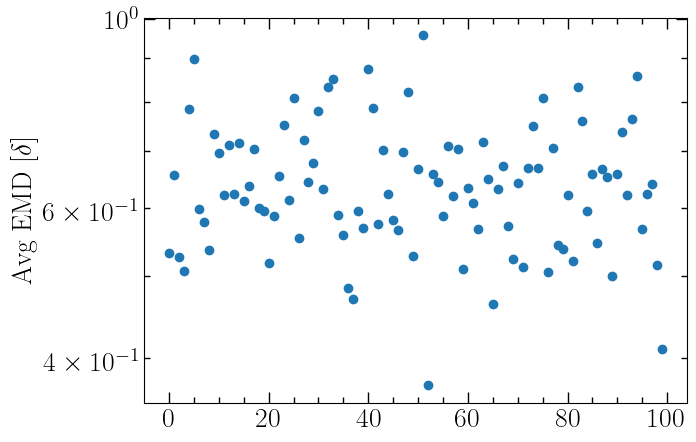

Boudary: periodic 	 #Sheets: 1000


  0%|          | 0/100 [00:00<?, ?it/s]



[1/L]	 n_sheets: 1000  avg: 0.0006  std: 0.0000  best: 0.0006 (14)  worst: 0.0007 (4)
[1/dx]	 n_sheets: 1000  avg: 0.6488  std: 0.0374  best: 0.5680 (14)  worst: 0.7432 (4)
Wasserstein
[1/L]	 n_sheets: 1000  avg: 0.0006  std: 0.0000  best: 0.0006 (14)  worst: 0.0007 (4)
[1/dx]	 n_sheets: 1000  avg: 0.6488  std: 0.0374  best: 0.5680 (14)  worst: 0.7432 (4)


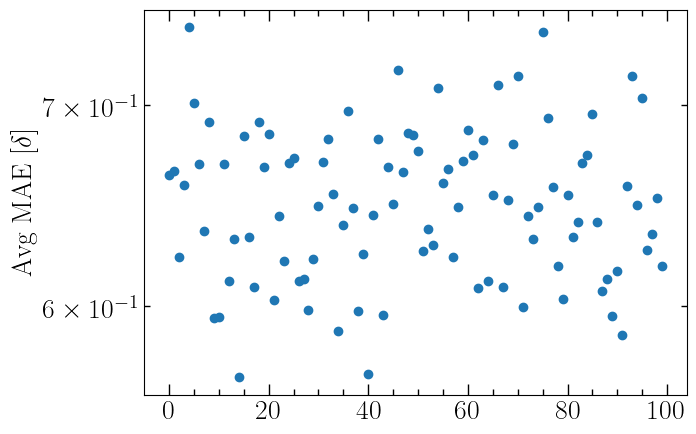

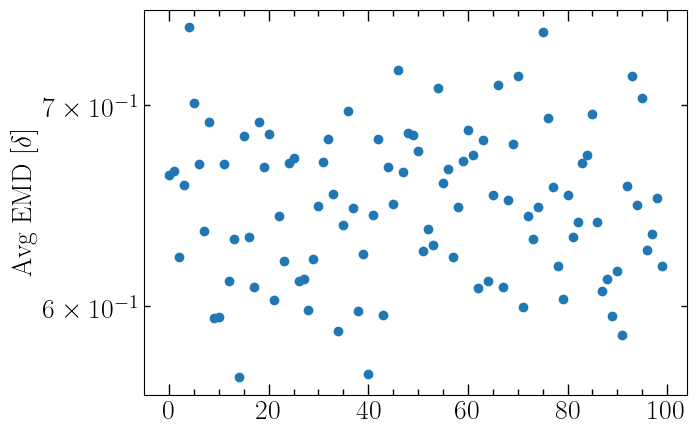

In [2]:
results = dict()

for dt in [1e-1]:
    
    model_folder = Path('../../models/final/dt{0:.0e}/collisions/0'.format(dt).replace('e-0', 'e-'))
    print(model_folder)
    
    results[dt] = dict()
    
    for boundary in ['reflecting','periodic']:

        sim = SMGNS(model_folder, boundary, verbose=True)

        N_SHEETS = [2, 10, 100, 1000]
        results[dt][boundary] = dict()

        for n_sheets in N_SHEETS:
            
            print(f'Boudary: {boundary} \t #Sheets: {n_sheets}')
            
            folder = f'../../data/dataset/test/{n_sheets}/{boundary}'
            X = jnp.array([jnp.load(f) for f in sorted(glob.glob(folder + '/x_[0-9]*.npy'))])
            V = jnp.array([jnp.load(f) for f in sorted(glob.glob(folder + '/v_*.npy'))])
            X_eq = jnp.array([jnp.load(f) for f in sorted(glob.glob(folder + '/x_eq*.npy'))])
            delta = get_dx_eq(n_sheets)

            with open(Path(folder) / 'info.yml', 'rb') as f:
                info = yaml.safe_load(f)
                dt_simulator = info['dt']*info['dt_undersample']
                
            
            X = X[:,::int(sim.dt_train/dt_simulator)]
            V = V[:,::int(sim.dt_train/dt_simulator)]
            X_eq = X_eq[:,::int(sim.dt_train/dt_simulator)]
            
            
            e_x, e_w = rollout_error_collisions(X, V, X_eq, sim)

            results[dt][boundary][n_sheets] = {'e_x': get_stats(e_x/delta),
                                               'e_w': get_stats(e_w/delta)}

            print()
            print(f'\n[1/L]\t n_sheets: {n_sheets}  avg: {np.mean(e_x):.4f}  std: {np.std(e_x):.4f}  best: {np.min(e_x):.4f} ({np.argmin(e_x)})  worst: {np.max(e_x):.4f} ({np.argmax(e_x)})')
            print(f'[1/dx]\t n_sheets: {n_sheets}  avg: {np.mean(e_x) / delta:.4f}  std: {np.std(e_x) / delta:.4f}  best: {np.min(e_x)/delta:.4f} ({np.argmin(e_x)})  worst: {np.max(e_x)/delta:.4f} ({np.argmax(e_x)})')
            print('Wasserstein')
            print(f'[1/L]\t n_sheets: {n_sheets}  avg: {np.mean(e_w):.4f}  std: {np.std(e_w):.4f}  best: {np.min(e_w):.4f} ({np.argmin(e_w)})  worst: {np.max(e_w):.4f} ({np.argmax(e_w)})')
            print(f'[1/dx]\t n_sheets: {n_sheets}  avg: {np.mean(e_w) / delta:.4f}  std: {np.std(e_w) / delta:.4f}  best: {np.min(e_w)/delta:.4f} ({np.argmin(e_w)})  worst: {np.max(e_w)/delta:.4f} ({np.argmax(e_w)})')
            
            plt.figure()
            plt.plot(e_x / delta, 'o')
            plt.ylabel('Avg MAE [$\delta$]')
            plt.yscale('log')
            plt.show()
            
            plt.figure()
            plt.plot(e_w / delta, 'o')
            plt.ylabel('Avg EMD [$\delta$]')
            plt.yscale('log')
            plt.show()

            del X, V, X_eq, delta

# save results
with open('benchmark_collisions.pkl', 'wb') as f:
    pickle.dump(results, f)

In [3]:
# load crossing results
with open('benchmark_rollout.pkl', 'rb') as f:
    results_cross = pickle.load(f)

# load collisional results
with open('benchmark_collisions.pkl', 'rb') as f:
    results = pickle.load(f)
    
N_SHEETS = [2, 10, 100, 1000]

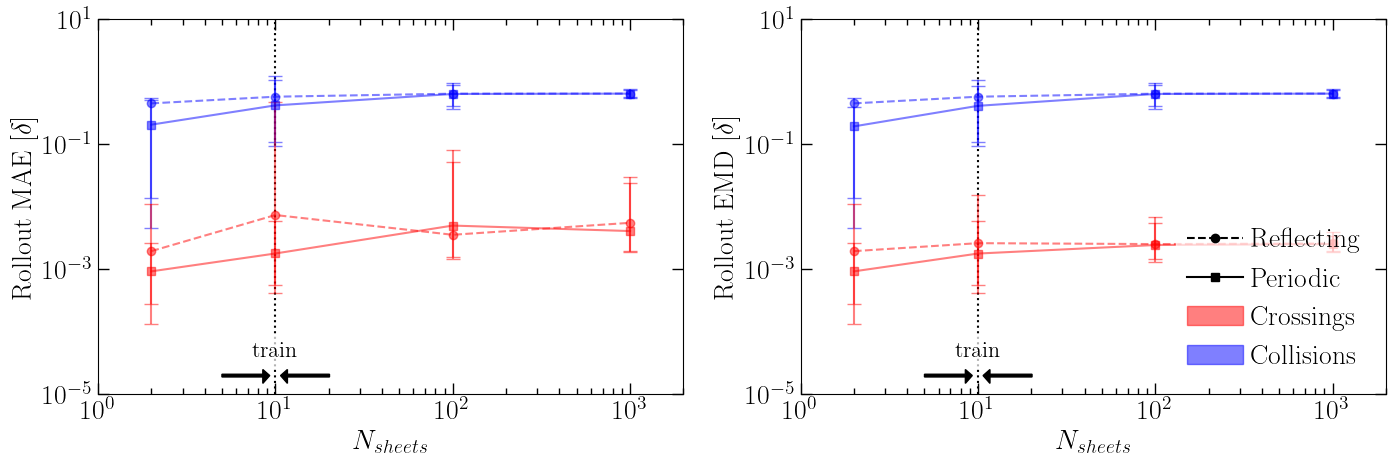

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(14,5), 
                       gridspec_kw={'top': 0.9, 'bottom': 0.15, 'left': 0.07, 'right': 0.99})

colors = {'Crossings': (1,0,0,0.5), 'Collisions': (0,0,1,0.5)}
linestyle = {'reflecting': '--', 'periodic': '-'}
markers = {'reflecting': 'o', 'periodic': 's'}

for a in ax:
    a.axvline(10, ls=':', color='k')
    a.arrow(20.2, 2*10**-5., -8.5, 0, width=0.2*10**-5, head_width=10**-5, head_length=1, color='k')
    a.arrow(5, 2*10**-5., 3.5, 0, width=0.2*10**-5, head_width=10**-5, head_length=0.8, color='k')
    a.text(7.4, 4*10**-5, 'train', fontsize=16, bbox=dict(facecolor='white', edgecolor='white', alpha=0.7))

    
for boundary, rb in results[1e-1].items():

    e_x = np.array([rb[n]['e_x']['mean'] for n in N_SHEETS])
    e_xmin = np.array([rb[n]['e_x']['min'] for n in N_SHEETS])
    e_xmax = np.array([rb[n]['e_x']['max'] for n in N_SHEETS])

    e_w = np.array([rb[n]['e_w']['mean'] for n in N_SHEETS])
    e_wmin = np.array([rb[n]['e_w']['min'] for n in N_SHEETS])
    e_wmax = np.array([rb[n]['e_w']['max'] for n in N_SHEETS])

    ax[0].errorbar(N_SHEETS, 
                   e_x,
                   yerr=[e_x - e_xmin, e_xmax - e_x],
                   capsize=5, ls=linestyle[boundary], color=colors['Collisions'],
                   marker=markers[boundary])

    ax[1].errorbar(N_SHEETS, 
                   e_w,
                   yerr=[e_w - e_wmin, e_wmax - e_w],
                   capsize=5, ls=linestyle[boundary], color=colors['Collisions'],
                   marker=markers[boundary])

for boundary, rb in results_cross[1e-1]['0'].items():

    e_x = np.array([rb[n]['e_x']['mean'] for n in N_SHEETS])
    e_xmin = np.array([rb[n]['e_x']['min'] for n in N_SHEETS])
    e_xmax = np.array([rb[n]['e_x']['max'] for n in N_SHEETS])

    e_w = np.array([rb[n]['e_w']['mean'] for n in N_SHEETS])
    e_wmin = np.array([rb[n]['e_w']['min'] for n in N_SHEETS])
    e_wmax = np.array([rb[n]['e_w']['max'] for n in N_SHEETS])

    ax[0].errorbar(N_SHEETS, 
                   e_x,
                   yerr=[e_x - e_xmin, e_xmax - e_x],
                   capsize=5, ls=linestyle[boundary], color=colors['Crossings'],
                   marker=markers[boundary])

    ax[1].errorbar(N_SHEETS, 
                   e_w,
                   yerr=[e_w - e_wmin, e_wmax - e_w],
                   capsize=5, ls=linestyle[boundary], color=colors['Crossings'],
                   marker=markers[boundary])

for a in ax:
    a.set_yscale('log')
    a.set_xscale('log')
    a.set_ylim(1e-5, 1e1)
    a.set_xlim(1, 2e3)
    a.set_xlabel('$N_{sheets}$')

ax[0].set_ylabel('MAE [$\delta$]')
ax[1].set_ylabel('EMD [$\delta$]')

handles = []
for b in markers:
    handles.append(mlines.Line2D([], [], color='k', linestyle=linestyle[b], marker=markers[b], label=b.capitalize()))
for dt, c in colors.items():
    handles.append(mpatches.Patch(color=c, label=dt))
ax[1].legend(handles=handles, loc='lower right', fontsize=20)

    
ax[0].set_ylabel('Rollout MAE [$\delta$]')
ax[1].set_ylabel('Rollout EMD [$\delta$]')
plt.savefig('../img/benchmark_crossings_vs_collisions.pdf')
plt.show()

dt: 0.1
Boundary: reflecting


  0%|          | 0/95 [00:00<?, ?it/s]

2024-01-03 14:00:54.399958: E external/org_tensorflow/tensorflow/compiler/xla/service/slow_operation_alarm.cc:65] Constant folding an instruction is taking > 2s:

  slice.4 (displaying the full instruction incurs a runtime overhead. Raise your logging level to 4 or above).

This isn't necessarily a bug; constant-folding is inherently a trade-off between compilation time and speed at runtime.  XLA has some guards that attempt to keep constant folding from taking too long, but fundamentally you'll always be able to come up with an input program that takes a long time.

If you'd like to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
2024-01-03 14:00:54.400078: E external/org_tensorflow/tensorflow/compiler/xla/service/slow_operation_alarm.cc:133] The operation took 4m32.433863923s
Constant folding an instruction is taking > 2s:

  slice.4 (displaying the full instruction incurs a runtime overhead. Raise your logging level to 4 or above).

This isn't ne

Rollout MAE: 0.0284 [L], 0.2842 [dx_eq]
Rollout EMD: 0.0284 [L], 0.2842 [dx_eq]


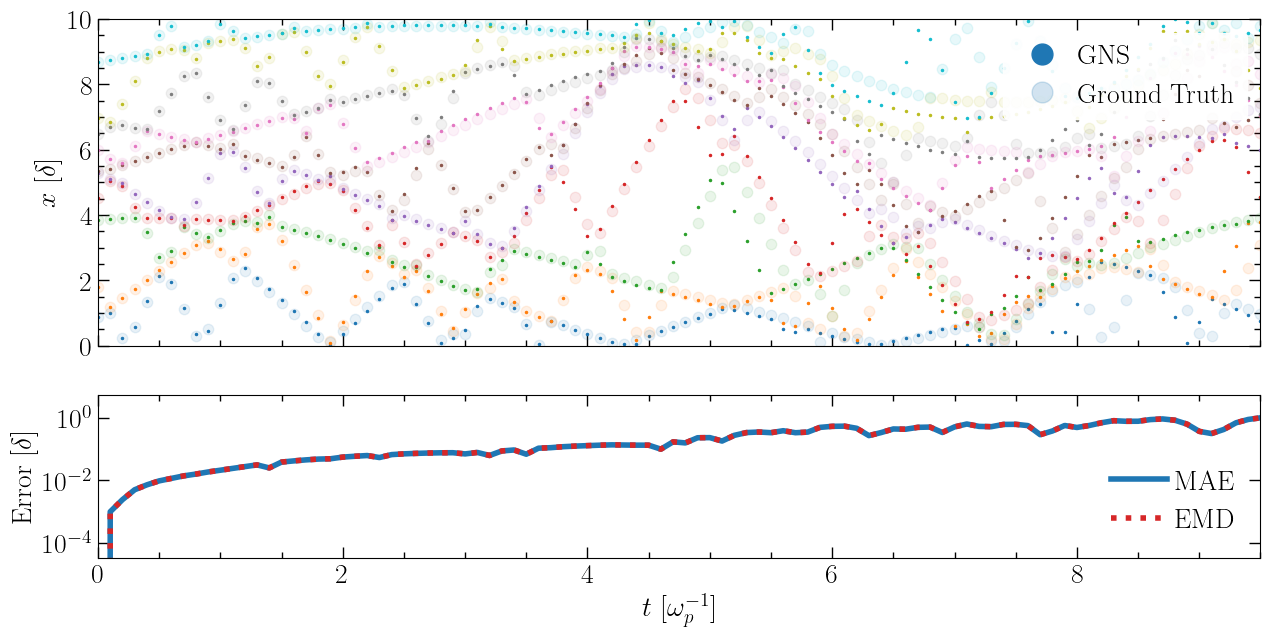

In [5]:
dt = 1e-1
boundary = 'reflecting'
model_folder = Path('../../models/final/dt{0:.0e}/collisions/0'.format(dt).replace('e-0', 'e-'))
sim = SMGNS(model_folder, boundary, False)

n_sheets = 10
print('dt:', dt)
print('Boundary:', boundary)

# load test data
folder = f'../../data/dataset/test/{n_sheets}/{boundary}'

with open(Path(folder) / 'info.yml', 'r') as f:
    info = yaml.safe_load(f)
    dt_simulator = info['dt'] * info['dt_undersample']

dt_undersample = int(sim.dt_train / dt_simulator)

I = 10
X = jnp.load(folder + f'/x_{I:04d}.npy')
V = jnp.load(folder + f'/v_{I:04d}.npy')
X_eq = jnp.load(folder + f'/x_eq_{I:04d}.npy')

X = X[::dt_undersample]
V = V[::dt_undersample]
X_eq = X_eq[::dt_undersample]

X, V, X_eq = crossings2collisions(X, V, X_eq, L=sim.L)

i_sorted = jnp.argsort(X[sim.w_size], axis=-1)
i_sorted = i_sorted[jnp.newaxis]

X = jnp.take_along_axis(X, i_sorted, axis=-1)
V = jnp.take_along_axis(V, i_sorted, axis=-1)
X_eq = jnp.take_along_axis(X_eq, i_sorted, axis=-1)


X0, V0, X_eq0 = init_XV_collisions(X,
                                   X_eq,
                                   w_size=sim.w_size,
                                   dt=sim.dt_train, 
                                   boundary=sim.boundary,
                                   L=1)


X_pred, V_pred, _, _ = sim.pred_rollout(X0,
                                        V0,
                                        X_eq0,
                                        t_max=(len(X) - 1 - sim.w_size)*sim.dt_train,
                                        verbose=True,
                                        n_guards=min(4, X0.shape[-1]),
                                        track_sheets=True,
                                        np_=np)

plot_trajectory_comparison(X_pred, X[sim.w_size:], boundary, sim.dt_train, normalize_dx_eq=True)